# Descripcion del problema

El objetivo del problema es predecir la etiqueta `total_cases` para cada (ciudad, año, semana_del_año) en el conjunto de pruebas. Hay dos ciudades, San Juan e Iquitos, con datos de prueba para cada ciudad que abarcan 5 y 3 años respectivamente.


El conjunto de pruebas es una retención futura pura, lo que significa que los datos de prueba son secuenciales y no se superponen con ninguno de los datos de entrenamiento. En todo momento, los valores faltantes se han llenado como NaNs.

# Cargamos todos los datos desde github

In [2]:
import pandas as pd

train_X = pd.read_csv('https://raw.githubusercontent.com/IgnacioBarb/Actividades-SNS/main/Act%203.8/CSV/dengue_features_train.csv')
train_Y = pd.read_csv('https://raw.githubusercontent.com/IgnacioBarb/Actividades-SNS/main/Act%203.8/CSV/dengue_labels_train.csv')
test_X = pd.read_csv('https://raw.githubusercontent.com/IgnacioBarb/Actividades-SNS/main/Act%203.8/CSV/dengue_features_test.csv')

# Visualizacion de datos

## train_X

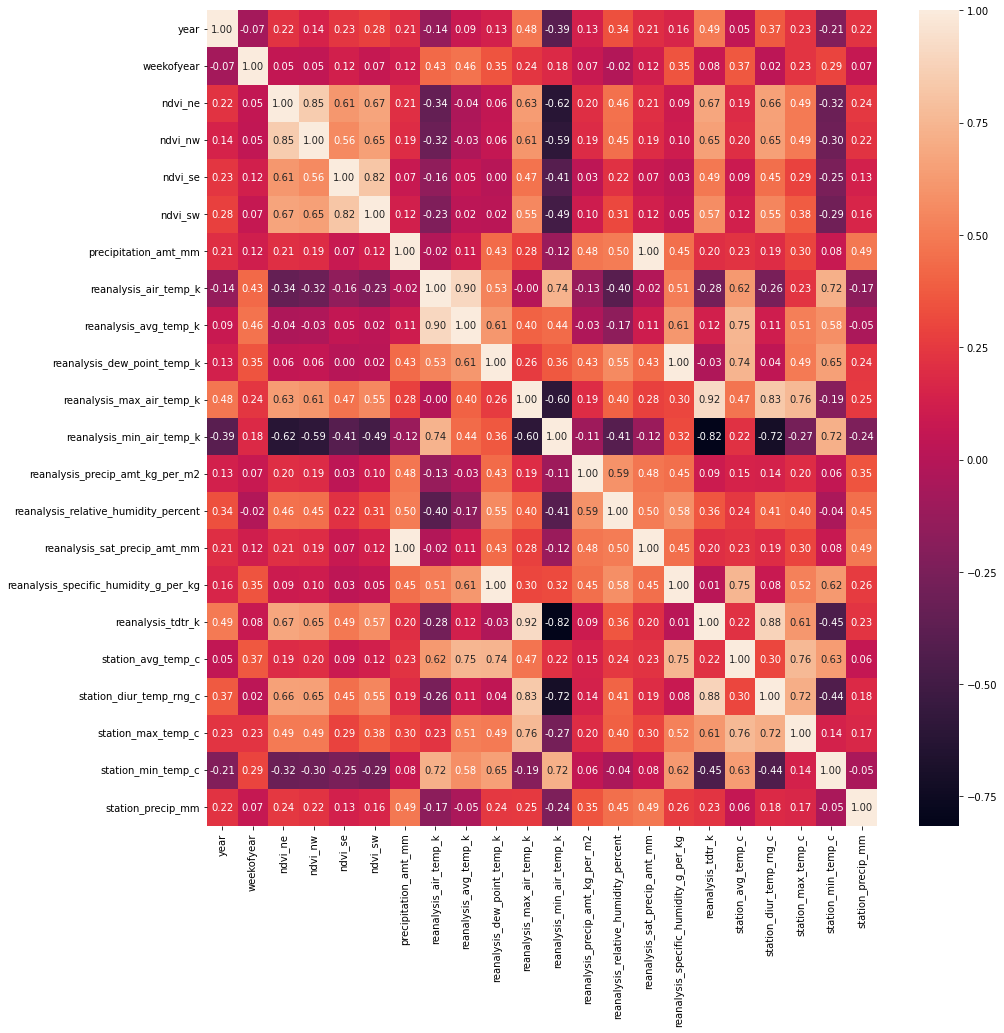

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(train_X.corr(), annot=True, fmt=".2f", ax=ax)
plt.show()

## test_X

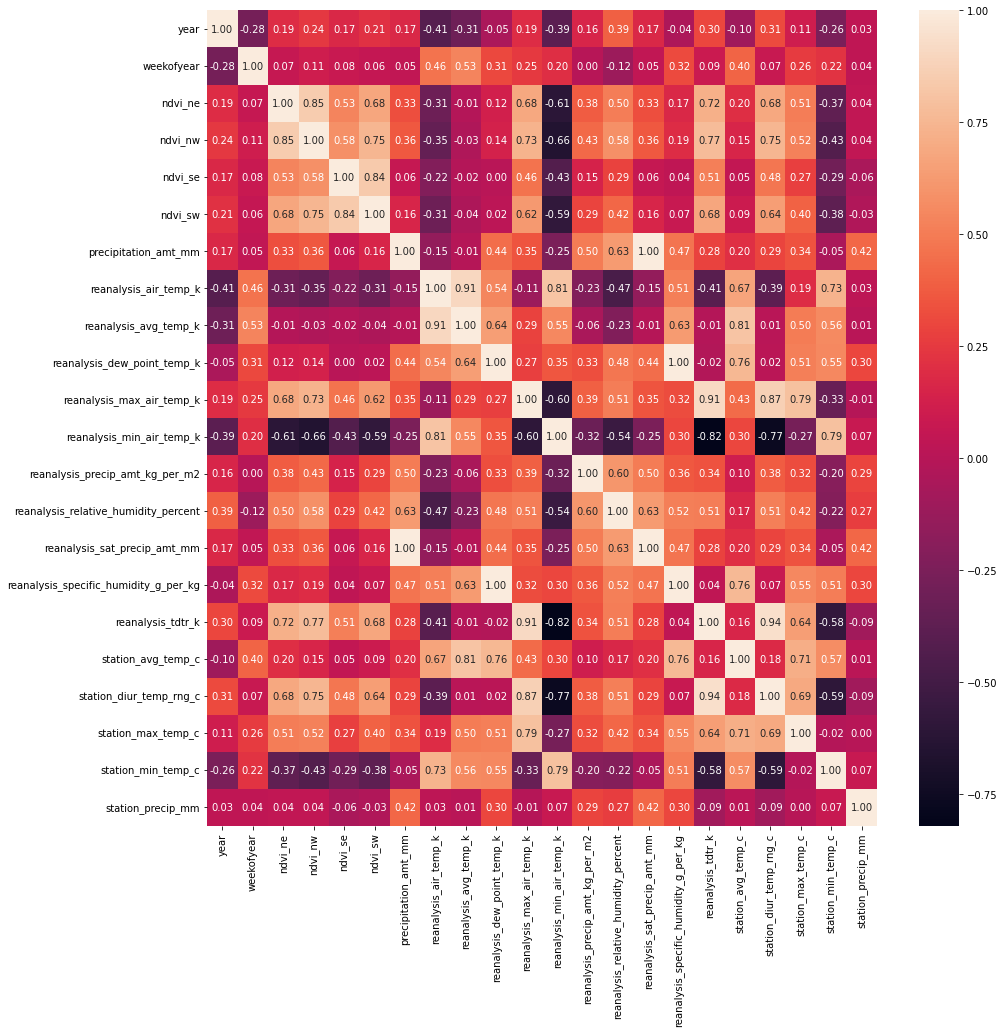

In [4]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(test_X.corr(), annot=True, fmt=".2f", ax=ax)
plt.show()

# Manipulacion de datos

In [5]:
train_X.dtypes

city                                      object
year                                       int64
weekofyear                                 int64
week_start_date                           object
ndvi_ne                                  float64
ndvi_nw                                  float64
ndvi_se                                  float64
ndvi_sw                                  float64
precipitation_amt_mm                     float64
reanalysis_air_temp_k                    float64
reanalysis_avg_temp_k                    float64
reanalysis_dew_point_temp_k              float64
reanalysis_max_air_temp_k                float64
reanalysis_min_air_temp_k                float64
reanalysis_precip_amt_kg_per_m2          float64
reanalysis_relative_humidity_percent     float64
reanalysis_sat_precip_amt_mm             float64
reanalysis_specific_humidity_g_per_kg    float64
reanalysis_tdtr_k                        float64
station_avg_temp_c                       float64
station_diur_temp_rn

In [6]:
train_Y.dtypes

city           object
year            int64
weekofyear      int64
total_cases     int64
dtype: object

In [7]:
test_X.dtypes

city                                      object
year                                       int64
weekofyear                                 int64
week_start_date                           object
ndvi_ne                                  float64
ndvi_nw                                  float64
ndvi_se                                  float64
ndvi_sw                                  float64
precipitation_amt_mm                     float64
reanalysis_air_temp_k                    float64
reanalysis_avg_temp_k                    float64
reanalysis_dew_point_temp_k              float64
reanalysis_max_air_temp_k                float64
reanalysis_min_air_temp_k                float64
reanalysis_precip_amt_kg_per_m2          float64
reanalysis_relative_humidity_percent     float64
reanalysis_sat_precip_amt_mm             float64
reanalysis_specific_humidity_g_per_kg    float64
reanalysis_tdtr_k                        float64
station_avg_temp_c                       float64
station_diur_temp_rn

### x_train

In [8]:
#Transformamo lo datos de city a numerico
train_X['city'] = train_X['city'].replace(['sj', 'iq'], [0,1]) 
#Eliminamos todos los datos de week_start_date 
train_X.drop(['week_start_date'], axis=1, inplace=True)
#Eliminamos todos los datos con mucha correlacion
train_X.drop(['reanalysis_sat_precip_amt_mm'], axis=1, inplace=True)
#Rellenamos los datos na
train_X.fillna(0, inplace=True)

### y_train

In [9]:
#Transformamo lo datos de city a numerico
train_Y['city'] = train_Y['city'].replace(['sj', 'iq'], [0,1])
#Rellenamos los datos na
train_Y.fillna(0, inplace=True)

### x_test

In [10]:
#Transformamo lo datos de city a numerico
test_X['city'] = test_X['city'].replace(['sj', 'iq'], [0,1])
#Eliminamos todos los datos de week_start_date
test_X.drop(['week_start_date'], axis=1, inplace=True)
#Eliminamos todos los datos con mucha correlacion
test_X.drop(['reanalysis_sat_precip_amt_mm'], axis=1, inplace=True)
#Rellenamos los datos na
test_X.fillna(0, inplace=True)

### Escalado de datos

In [11]:
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

#Escalamos los datos
scaler = MaxAbsScaler()
train_X[train_X.columns] = scaler.fit_transform(train_X)
test_X[test_X.columns] = scaler.fit_transform(test_X)

# Modelo

In [12]:
#Dividemos los datasets de train
from sklearn.model_selection import train_test_split
train_Y = train_Y['total_cases']

trainX, testX, trainY, testY  = train_test_split(train_X, train_Y, test_size = 0.2)

## Modelo `RandomForestRegressor` con `GridSearchCV`




### Obtenemos los mejores valores para el entrenamiento

In [13]:
#Parametros que vamos a probar
param_dist = {"n_estimators": [2, 4, 8, 16, 32, 64, 128, 256],
              "max_features": ['sqrt', 'log2', None],
              "max_depth": [8,4, 2],
              "min_samples_split": [2, 4, 6],
              "min_samples_leaf": [8, 12, 16],
              "bootstrap": [False, True]
            }

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error as mae

#Probamos todos los parametros
regressor = RandomForestRegressor() 
grid_regres = GridSearchCV(estimator = regressor, param_grid= param_dist, cv = 5)
grid_regres.fit(trainX, trainY)

#Obtenemos el MAE de los mejores parametros con los datos de entrenaminto
predY = grid_regres.best_estimator_.predict(testX)
score = mae(testY, predY)
print(f'Los mejores parametros: \n{grid_regres.best_estimator_} \n Mae -> {score}')

Los mejores parametros: 
RandomForestRegressor(bootstrap=False, max_depth=8, max_features='sqrt',
                      min_samples_leaf=8, min_samples_split=6, n_estimators=32) 
 Mae -> 15.094392537636214


/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3249: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


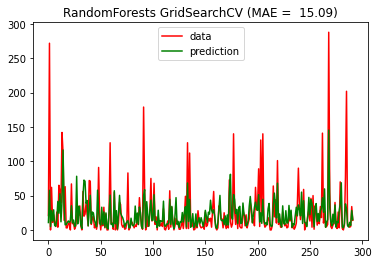

In [15]:
import numpy as np
#Mostarmos de forma grafica la diferencia entre el testY y predY
xx = np.stack(i for i in range(testY.shape[0]))
plt.plot(xx, testY, c='r', label='data')
plt.plot(xx, predY, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("RandomForests GridSearchCV (MAE = %6.2f)" % (score))

plt.show()

### Entrenamos con los mejores pesos

In [16]:
regressor =  grid_regres.best_estimator_
regressor.fit(train_X, train_Y)

RandomForestRegressor(bootstrap=False, max_depth=8, max_features='sqrt',
                      min_samples_leaf=8, min_samples_split=6, n_estimators=32)

### Exportacion del la prediccion

In [17]:
#Obtenemos la prediccion
RFRpred_y = regressor.predict(test_X)

#Transformamos los datos a enteros
RFRpred_y = RFRpred_y.astype(int) 

#leemos el submission_format
predicionRFR = pd.read_csv('https://raw.githubusercontent.com/IgnacioBarb/Actividades-SNS/main/Act%203.8/CSV/submission_format.csv')

#rellenamos los datos de 'total_case' con la prediccion
predicionRFR['total_cases'] = RFRpred_y

predicionRFR

,city,year,weekofyear,total_cases
0,sj,2008,18,10
1,sj,2008,19,11
2,sj,2008,20,10
3,sj,2008,21,12
4,sj,2008,22,13
...,...,...,...,...
411,iq,2013,22,10
412,iq,2013,23,9
413,iq,2013,24,5
414,iq,2013,25,5


In [18]:
#Exportamos el csv
predicionRFR.to_csv('entregaRFR.csv' , index = False)

### Resultados

El mejor resultado obtenido con este modelo fue:
- 25.3510 con `MaxAbsScaler`


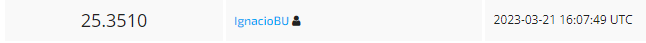

## Modelo `DecisionTreeRegressor` con `RandomizedSearchCV`



### Obtenemos los mejores valores para el entrenamiento

In [19]:
#Parametros que vamos a probar
param_dist = {"criterion":["squared_error", "friedman_mse", "absolute_error", "poisson"],
              "splitter":["best", "random"],
              "max_features": ['sqrt', 'log2', None],
              "max_depth": [8, 4, 2],
              "min_samples_split": [2, 4, 6],
              "min_samples_leaf": [8, 12, 16]
            }

In [20]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV

#Probamos todos los parametros
regressor = DecisionTreeRegressor() 
random_regres = RandomizedSearchCV(estimator = regressor, param_distributions = param_dist, cv = 5, random_state=0)
random_regres.fit(trainX, trainY)

#Obtenemos el MAE de los mejores parametros con los datos de entrenaminto
predY = random_regres.best_estimator_.predict(testX)
score = mae(testY, predY)
print(f'Los mejores parametros: \n{random_regres.best_estimator_} \nMae -> {score}')

Los mejores parametros: 
DecisionTreeRegressor(criterion='friedman_mse', max_depth=2, min_samples_leaf=8) 
Mae -> 19.79926482066893


/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3249: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


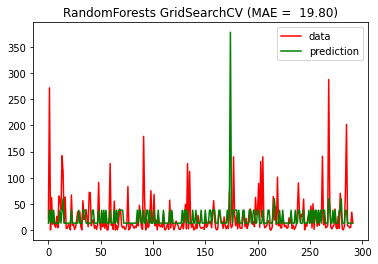

In [21]:
import numpy as np
#Mostarmos de forma grafica la diferencia entre el testY y predY
xx = np.stack(i for i in range(testY.shape[0]))
plt.plot(xx, testY, c='r', label='data')
plt.plot(xx, predY, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("RandomForests GridSearchCV (MAE = %6.2f)" % (score))

plt.show()

### Entrenamos con los mejores pesos

In [22]:
regressor =  random_regres.best_estimator_
regressor.fit(train_X, train_Y)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=2, min_samples_leaf=8)

### Exportacion del la prediccion

In [23]:
#Obtenemos la prediccion
DTRpred_y = regressor.predict(test_X)

#Transformamos los datos a enteros
DTRpred_y = DTRpred_y.astype(int) 

#leemos el submission_format
predicionDTR = pd.read_csv('https://raw.githubusercontent.com/IgnacioBarb/Actividades-SNS/main/Act%203.8/CSV/submission_format.csv')

#rellenamos los datos de 'total_case' con la prediccion
predicionDTR['total_cases'] = DTRpred_y

predicionDTR

,city,year,weekofyear,total_cases
0,sj,2008,18,12
1,sj,2008,19,12
2,sj,2008,20,12
3,sj,2008,21,12
4,sj,2008,22,12
...,...,...,...,...
411,iq,2013,22,12
412,iq,2013,23,12
413,iq,2013,24,12
414,iq,2013,25,12


In [24]:
#Exportamos el csv
predicionRFR.to_csv('entregaDTR.csv' , index = False)

### Resultado

El mejor resultado obtenido con este modelo fue:
- 28.3966 con `MaxAbsScaler`

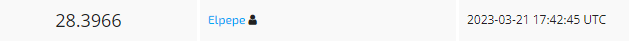

## Modelo `VotingRegressor`

`VotingRegressor` es un metaestimador de conjunto que se ajusta a varios modelos base, cada uno se ejecuta sobre el conjunto de datos completo. Luego promedia las predicciones individuales para formar una predicción final.

### Obteniendo los mejores parametros para el modelo `GradientBoostingRegressor`

In [25]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error as mae

loss = ['squared_error', 'absolute_error', 'huber', 'quantile'] 
n_estimators = [2, 4, 8, 16, 32, 64, 128, 256, 512]
min_samples_leaf = [8, 12, 16]

res = {}
for i in loss:
  for j in n_estimators:
    for k in min_samples_leaf:
      gp = GradientBoostingRegressor(loss = i, n_estimators=j, min_samples_leaf= k)
      gp.fit(trainX, trainY)
      predY = gp.predict(testX)
      score = mae(testY, predY)
      res[score] = [i, j, k]

print(f'Mejor resultado: \nMAE => {min(res)} \nValores => {res[min(res)]}')

Mejor resultado: 
MAE => 12.259133844784149 
Valores => ['huber', 256, 8]


### Construyendo el modelo 

In [26]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor

#Modelo GBR con los mejores parametros obtenidos
r1 = GradientBoostingRegressor(loss = res[min(res)][0], n_estimators=res[min(res)][1], min_samples_leaf= res[min(res)][2])
#Modelo RFR con los parametros obtenidos enteriormente 
r2 = RandomForestRegressor(bootstrap=False, max_depth=8, max_features='log2',min_samples_leaf=8, min_samples_split=6, n_estimators=8)
#Modelo KNN con los parametros obtenidos en la actividad 3.8 V1
r3 = KNeighborsRegressor(12, weights='distance') 

er = VotingRegressor([('gb',r1),('rf', r2), ('knn', r3)], verbose = True, n_jobs = 100)
er.fit(train_X, train_Y)

VotingRegressor(estimators=[('gb',
                             GradientBoostingRegressor(loss='huber',
                                                       min_samples_leaf=8,
                                                       n_estimators=256)),
                            ('rf',
                             RandomForestRegressor(bootstrap=False, max_depth=8,
                                                   max_features='log2',
                                                   min_samples_leaf=8,
                                                   min_samples_split=6,
                                                   n_estimators=8)),
                            ('knn',
                             KNeighborsRegressor(n_neighbors=12,
                                                 weights='distance'))],
                n_jobs=100, verbose=True)

### Exportacion de la prediccion

In [27]:
#Obtenemos la prediccion
pred_y = er.predict(test_X)

#Transformamos los datos a enteros
pred_y = pred_y.astype(int) 

#leemos el submission_format
predicion = pd.read_csv('https://raw.githubusercontent.com/IgnacioBarb/Actividades-SNS/main/Act%203.8/CSV/submission_format.csv')

#rellenamos los datos de 'total_case' con la prediccion
predicion['total_cases'] = pred_y

predicion

,city,year,weekofyear,total_cases
0,sj,2008,18,6
1,sj,2008,19,7
2,sj,2008,20,8
3,sj,2008,21,10
4,sj,2008,22,12
...,...,...,...,...
411,iq,2013,22,6
412,iq,2013,23,6
413,iq,2013,24,5
414,iq,2013,25,5


In [28]:
#Exportamos el csv
predicion.to_csv('entrega.csv' , index = False)

### Resultado

El mejor resultado obtenido con este modelo fue:
- 24.7524 con `MaxAbsScaler`

Con este resultado consegui entrar entre los 1000 mejores

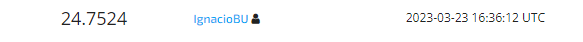